In [2]:
import pandas as pd

In [18]:
data1 = {
    "Country": ["US", "IE", "CA", "FR", "SP"],
    "GDP": [45000, 46000,42000,47000,53000]
}
df1 = pd.DataFrame(data1)

In [12]:
df1

,Country,GDP
0,US,45000
1,IE,46000
2,CA,42000
3,FR,47000
4,SP,53000


In [19]:
df2 = pd.DataFrame({
    "Year": [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010],
    "Unemployment": [9.8,12,8,7.2,6.9,4.2,7,6.5,6.2,5.5]
})
df2

,Year,Unemployment
0,1920,9.8
1,1930,12.0
2,1940,8.0
3,1950,7.2
4,1960,6.9
5,1970,4.2
6,1980,7.0
7,1990,6.5
8,2000,6.2
9,2010,5.5


In [7]:
df3 = pd.DataFrame({
    "Interest_Rate": [5,5.5,6,5.5,5.25,6.5,7,8,7.5,8.5],
    "Stock_Price": [1500,1520,1525,1523,1515,1540,1545,1560,1555,1565]
})
df3

,Interest_Rate,Stock_Price
0,5.00,1500
1,5.50,1520
2,6.00,1525
3,5.50,1523
4,5.25,1515
5,6.50,1540
6,7.00,1545
7,8.00,1560
8,7.50,1555
9,8.50,1565


In [20]:
df1.set_index("Country", inplace=True)
df2.set_index("Year", inplace=True)

In [22]:
print(df1)
print(df2)
print(df3)

           GDP
Country       
US       45000
IE       46000
CA       42000
FR       47000
SP       53000
      Unemployment
Year              
1920           9.8
1930          12.0
1940           8.0
1950           7.2
1960           6.9
1970           4.2
1980           7.0
1990           6.5
2000           6.2
2010           5.5
   Interest_Rate  Stock_Price
0           5.00         1500
1           5.50         1520
2           6.00         1525
3           5.50         1523
4           5.25         1515
5           6.50         1540
6           7.00         1545
7           8.00         1560
8           7.50         1555
9           8.50         1565


## Dash GUI

In [24]:
import tkinter as tk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

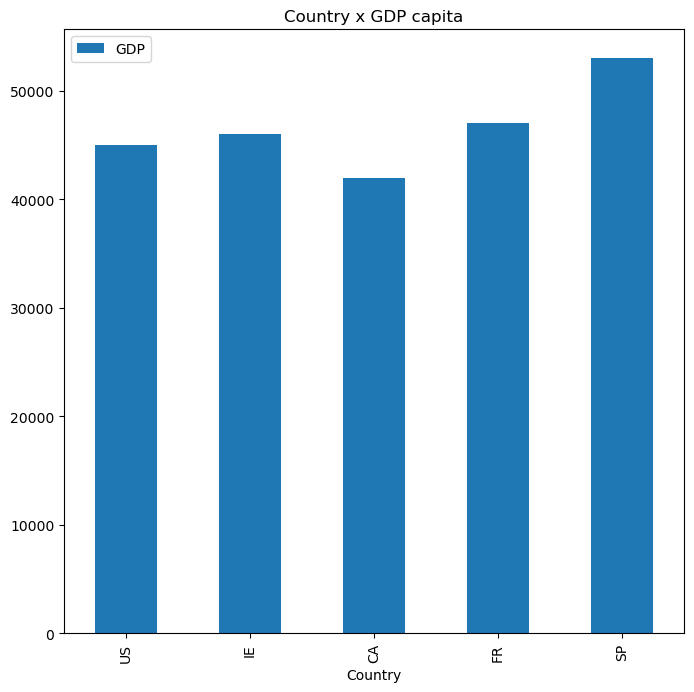

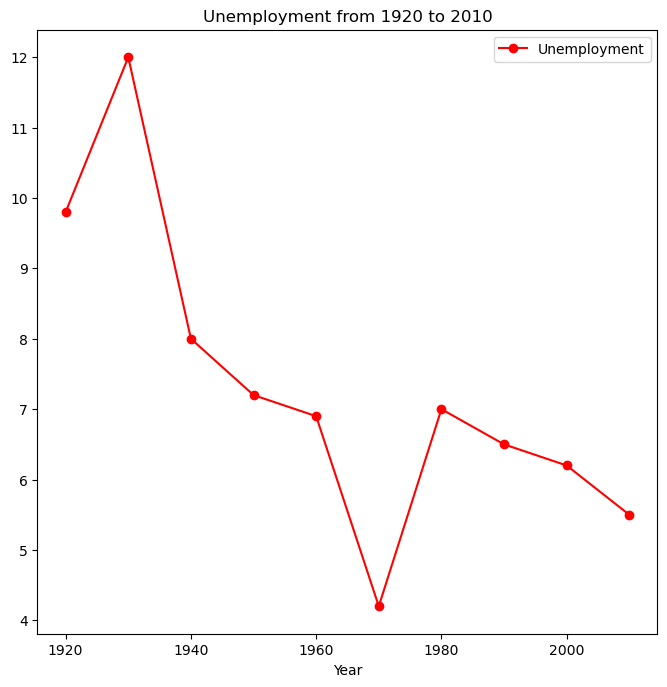

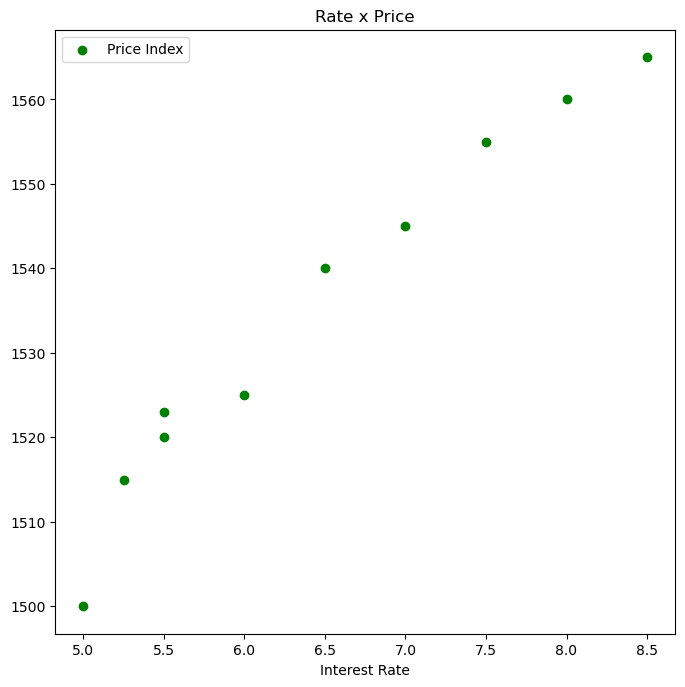

In [27]:
root = tk.Tk()

# First dataframe as bar chart

fig1 = plt.figure(figsize=(8,8), dpi=100)
ax1 = fig1.add_subplot(111)

bar1 = FigureCanvasTkAgg(fig1, root)
bar1.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)

df1.plot(kind="bar", legend=True, ax=ax1)
ax1.set_title("Country x GDP capita")

# Second datafram as line graph

fig2 = plt.figure(figsize=(8,8), dpi=100)
ax2 = fig2.add_subplot(111)

line2 = FigureCanvasTkAgg(fig2, root)
line2.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)

df2.plot(kind="line", legend=True, ax=ax2, color='r', marker='o')
ax2.set_title("Unemployment from 1920 to 2010")

# Third dataframe as scatter plot

fig3 = plt.figure(figsize=(8,8), dpi=100)
ax3 = fig3.add_subplot(111)

scatter3 = FigureCanvasTkAgg(fig3, root)
scatter3.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)

ax3.scatter(df3["Interest_Rate"], df3["Stock_Price"], color="g")
ax3.legend(["Price Index"])
ax3.set_xlabel("Interest Rate")
ax3.set_title("Rate x Price")

root.mainloop()

In [31]:
from matplotlib.figure import Figure

In [43]:
root = tk.Tk()

canvas = tk.Canvas(root, width=800, height=300)
canvas.pack()

label = tk.Label(root, text="GUI")
label.config(font=("Arial", 20))
canvas.create_window(400, 50, window=label)

entry1 = tk.Entry(root)
canvas.create_window(400,100,window=entry1)

entry2 = tk.Entry(root)
canvas.create_window(400,120,window=entry2)

entry3 = tk.Entry(root)
canvas.create_window(400,140,window=entry3)

def createCharts():
    global bar
    global pie
    
    num1 = float(entry1.get())
    num2 = float(entry2.get())
    num3 = float(entry3.get())
    
    fig1 = Figure(figsize=(5,5), dpi=100)
    ax1 = fig1.add_subplot(111)
    
    ax1.bar(["num1, num2, num3"], [num1, num2, num3], color="blue")
    bar = FigureCanvasTk.Agg(fig1, root)
    bar.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)
    
    fig2 = Figure(figsize=(5,5), dpi=100)
    ax2 = fig2.add_subplot(111)
    
    ax2.pie(
        [num1, num2, num3],
        labels=["num1", "num2", "num3"],
        colors=["blue", "green", "red"],
        startangle=90
    )
    
    pie = FigureCanvasTkAgg(fig2, root)
    pie.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)
    
def clearCharts():    
    try:
        bar.get_tk_widget().pack_forget()
        pie.get_tk_widget().pack_forget()
    except:
        pass

createChartsButton = tk.Button(
    root,
    text="Create Charts",
    command=createCharts,
    bg="green",
    font=("Poppins", 11, "bold")
)

canvas.create_window(400,180,window=createChartsButton)

clearChartsButton = tk.Button(
    root,
    text="Clear Charts",
    command=clearCharts,
    bg="blue",
    font=("Poppins", 11, "bold")
)

canvas.create_window(400,220,window=clearChartsButton)

exitButton = tk.Button(
    root,
    text="Exit",
    command=root.destroy,
    bg="red",
    font=("Poppins", 11, "bold")
)

canvas.create_window(400,250,window=exitButton)

root.mainloop()